In [4]:
# Check the first few lines of the file
file_path = 'insurance_data.txt'
with open(file_path, 'r') as file:
    for i in range(5):  # Read first 5 lines
        print(file.readline().strip())

UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
145249|12827|2015-03-01 00:00:00|True|  |Close Corporation|Mr|English|First National Bank|Current account|Not specified|Not specified|South Africa|Gauteng|1459|Rand East|Rand East|Mobility - Motor|44069150|Passenger Vehicle|2004|MERCEDES-BENZ|E 240|6|2597|130|S/D|4|6/2002|119300|Yes|No|119300|More than 6 months||||||0.01|Monthly|25|Mobility - Windscreen

In [5]:
import pandas as pd

# Try different delimiters
try:
    # Attempt comma-separated (default)
    data = pd.read_csv(file_path)
    print(data.head())
except:
    try:
        # Attempt tab-separated
        data = pd.read_csv(file_path, sep='\t')
        print(data.head())
    except:
        try:
            # Attempt space-separated
            data = pd.read_csv(file_path, sep='\s+', engine='python')
            print(data.head())
        except:
            # Try specifying encoding
            data = pd.read_csv(file_path, encoding='latin1')
            print(data.head())

  UnderwrittenCoverID|PolicyID|TransactionMonth|IsVATRegistered|Citizenship|LegalType|Title|Language|Bank|AccountType|MaritalStatus|Gender|Country|Province|PostalCode|MainCrestaZone|SubCrestaZone|ItemType|mmcode|VehicleType|RegistrationYear|make|Model|Cylinders|cubiccapacity|kilowatts|bodytype|NumberOfDoors|VehicleIntroDate|CustomValueEstimate|AlarmImmobiliser|TrackingDevice|CapitalOutstanding|NewVehicle|WrittenOff|Rebuilt|Converted|CrossBorder|NumberOfVehiclesInFleet|SumInsured|TermFrequency|CalculatedPremiumPerTerm|ExcessSelected|CoverCategory|CoverType|CoverGroup|Section|Product|StatutoryClass|StatutoryRiskType|TotalPremium|TotalClaims
0  145249|12827|2015-03-01 00:00:00|True|  |Close...                                                                                                                                                                                                                                                                                                             

In [8]:
import pandas as pd

# Load the data
file_path = 'insurance_data.txt'
data = pd.read_csv(file_path, sep='|')

# Verify the data
print(data.head())
print(data.info())
print(data.isnull().sum())  # Check for missing values

/tmp/ipython-input-8-3478930124.py:5: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
file_path = 'insurance_data.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False)

# Drop columns with >50% missing values
missing_percent = data.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 50].index
data = data.drop(columns=cols_to_drop)

# Handle remaining missing values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert CapitalOutstanding to numeric
data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'], errors='coerce')
data['CapitalOutstanding'] = data['CapitalOutstanding'].fillna(data['CapitalOutstanding'].median())

# Parse TransactionMonth
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
data['Year'] = data['TransactionMonth'].dt.year
data['Month'] = data['TransactionMonth'].dt.month
data = data.drop(columns=['TransactionMonth'])

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(['TotalPremium', 'TotalClaims'], axis=1)
y = data['TotalPremium']

# Scale numerical features
scaler = StandardScaler()
num_cols_to_scale = numerical_cols.drop(['TotalPremium', 'TotalClaims'])
X[num_cols_to_scale] = scaler.fit_transform(X[num_cols_to_scale])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
file_path = 'insurance_data.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False)

# Manually drop columns with >50% missing values based on prior info
cols_to_drop = ['NumberOfVehiclesInFleet', 'CrossBorder', 'WrittenOff', 'Rebuilt', 'Converted', 'CustomValueEstimate']
data = data.drop(columns=cols_to_drop)
print(f"Dropped columns: {cols_to_drop}")

# Handle remaining missing values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert CapitalOutstanding to numeric
data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'], errors='coerce')
data['CapitalOutstanding'] = data['CapitalOutstanding'].fillna(data['CapitalOutstanding'].median())

# Parse TransactionMonth
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
data['Year'] = data['TransactionMonth'].dt.year
data['Month'] = data['TransactionMonth'].dt.month
data = data.drop(columns=['TransactionMonth'])

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(['TotalPremium', 'TotalClaims'], axis=1)
y = data['TotalPremium']

# Scale numerical features
scaler = StandardScaler()
num_cols_to_scale = numerical_cols.drop(['TotalPremium', 'TotalClaims'])
X[num_cols_to_scale] = scaler.fit_transform(X[num_cols_to_scale])

Dropped columns: ['NumberOfVehiclesInFleet', 'CrossBorder', 'WrittenOff', 'Rebuilt', 'Converted', 'CustomValueEstimate']


In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 56.80


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest - Root Mean Squared Error: {rf_rmse:.2f}")
print(f"Random Forest - R² Score: {rf_r2:.2f}")

Random Forest - Mean Squared Error: 3074.71
Random Forest - Root Mean Squared Error: 55.45
Random Forest - R² Score: 0.89


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


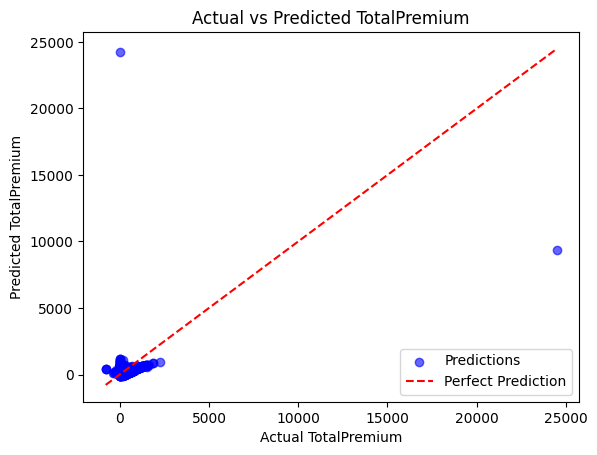

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual TotalPremium')
plt.ylabel('Predicted TotalPremium')
plt.title('Actual vs Predicted TotalPremium')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are available from the previous split and prediction
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 15790.54
Root Mean Squared Error: 125.66
R² Score: 0.43


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
file_path = 'insurance_data.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False)

# Verify initial columns
print(f"Initial columns: {data.columns.tolist()}")

# Parse TransactionMonth (already done in your output, confirming 'Year' and 'Month')
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
data['Year'] = data['TransactionMonth'].dt.year
data['Month'] = data['TransactionMonth'].dt.month
data = data.drop(columns=['TransactionMonth'])

# Handle missing values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert CapitalOutstanding to numeric
data['CapitalOutstanding'] = pd.to_numeric(data['CapitalOutstanding'], errors='coerce')
data['CapitalOutstanding'] = data['CapitalOutstanding'].fillna(data['CapitalOutstanding'].median())

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(['TotalPremium', 'TotalClaims'], axis=1)
y = data['TotalPremium']

# Scale numerical features
scaler = StandardScaler()
num_cols_to_scale = numerical_cols.drop(['TotalPremium', 'TotalClaims'])
X[num_cols_to_scale] = scaler.fit_transform(X[num_cols_to_scale])

# Verify processed columns
print(f"Processed columns in X: {X.columns.tolist()}")

Initial columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count


Processed columns in X: ['UnderwrittenCoverID', 'PolicyID', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'Year', 'Month']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse:.2f}")
print(f"Random Forest - Root Mean Squared Error: {rf_rmse:.2f}")
print(f"Random Forest - R² Score: {rf_r2:.2f}")

Random Forest - Mean Squared Error: 3086.18
Random Forest - Root Mean Squared Error: 55.55
Random Forest - R² Score: 0.89


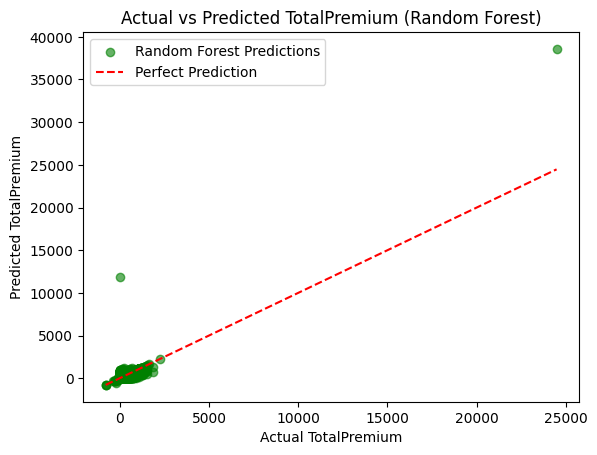

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_pred, alpha=0.6, color='green', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual TotalPremium')
plt.ylabel('Predicted TotalPremium')
plt.title('Actual vs Predicted TotalPremium (Random Forest)')
plt.legend()
plt.show()